<a href="https://colab.research.google.com/github/vincentei/Python_aux/blob/master/python_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

Notes from:

https://www.kaggle.com/learn/data-visualisation


In [0]:
# load boston
boston = datasets.load_boston()

In [0]:
features = boston.data
target = boston.target

In [4]:
df = pd.DataFrame(features,columns=boston.feature_names)
df['MEDV'] = target
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [5]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

# Univariate plotting with pandas

## Bar chart

In [0]:
df['des'] = None
idx = df['MEDV'] > 17
df.loc[idx,'des'] = 'above17'
df.loc[~idx,'des'] = 'below17'

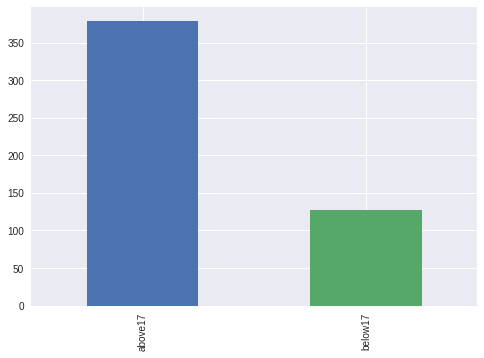

In [7]:
df['des'].value_counts().plot.bar()

## Line charts

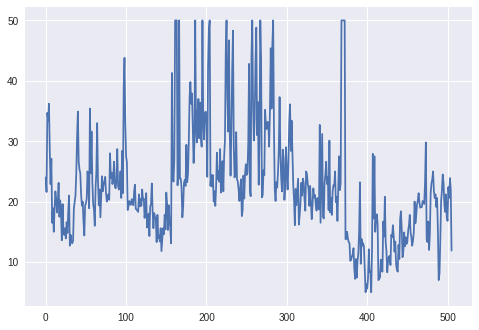

In [8]:
df['MEDV'].plot.line()

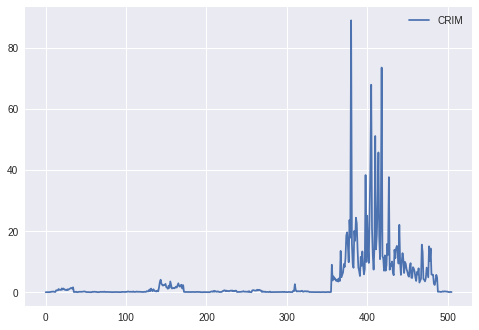

In [9]:
df.plot(y='CRIM',kind='line')

## Area chart

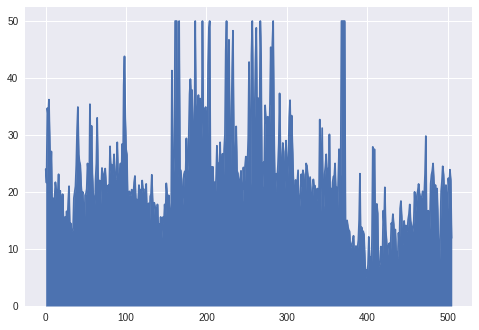

In [10]:
df['MEDV'].plot.area() # just a line chart with the bottom shaded

## Histogram

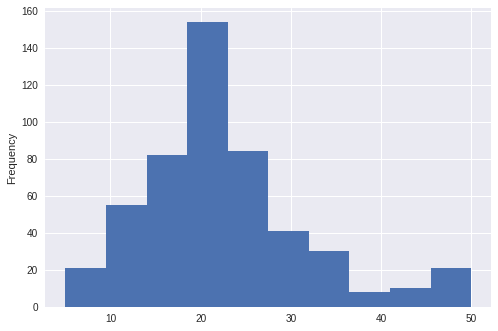

In [11]:
df['MEDV'].plot.hist()

# Bivariate plotting with pandas

## Scatter plot

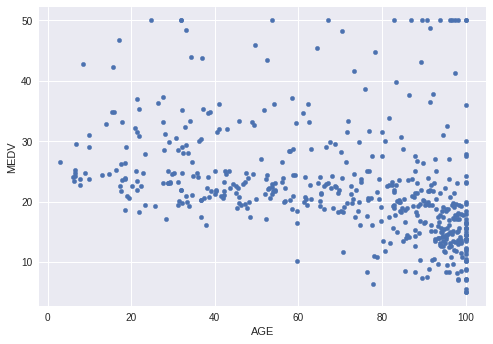

In [12]:
df.plot(y='MEDV',x='AGE',kind='scatter')

## Hexplot

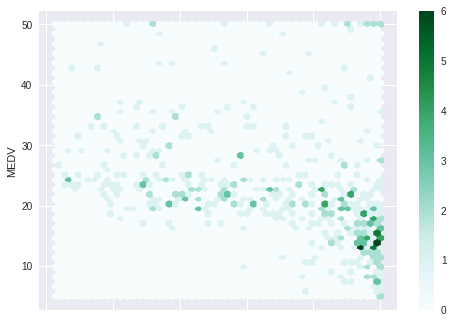

In [13]:
df.plot(y='MEDV',x='AGE',kind='hexbin',gridsize=50)
#df.plot.hexbin(y='MEDV',x='AGE',gridsize=50)

## Bivariate line chart

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


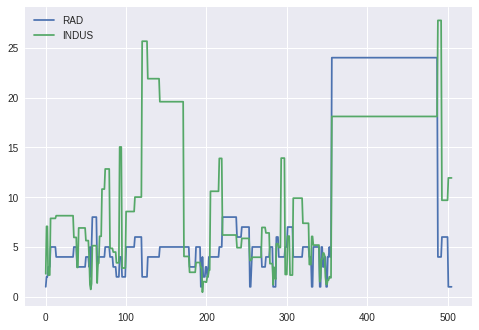

In [14]:
df.plot(y=['RAD','INDUS'],kind='line')

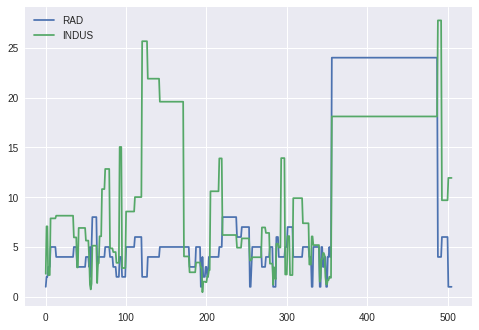

In [15]:
df[['RAD','INDUS']].plot.line()

# Styling plots

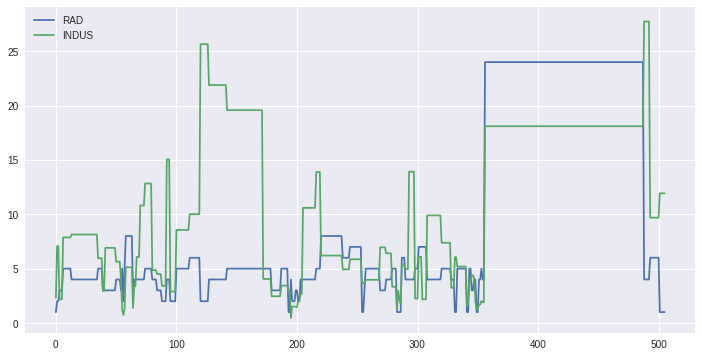

In [16]:
# make the plot bigger
df[['RAD','INDUS']].plot.line(figsize=(12,6))

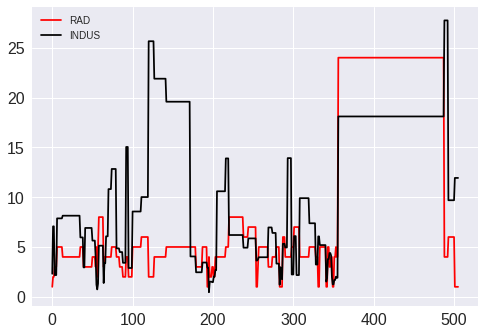

In [17]:
# change the color and font size
df[['RAD','INDUS']].plot.line(color=['red','black'],fontsize=16)

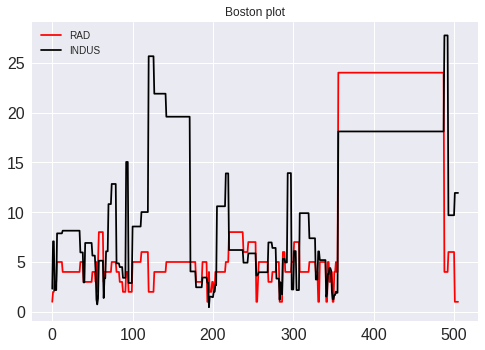

In [18]:
# now add a title
df[['RAD','INDUS']].plot.line(color=['red','black'],fontsize=16,title='Boston plot')

- Pandas does not allow you to make title bigger.
- Pandas plot function is built on top of matplotlib.
- Using matplot lib this should be possible

Text(0.5,1,'Boston plot')

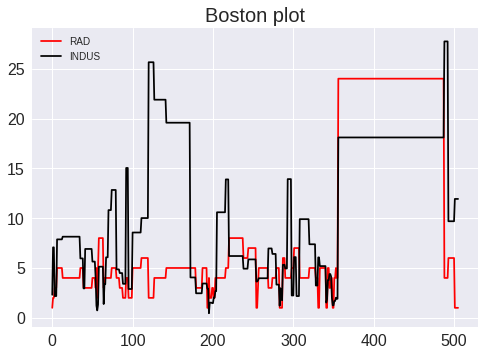

In [19]:
#import matplotlib.pyplot as plt

ax =df[['RAD','INDUS']].plot.line(
    color=['red','black'],
    fontsize=16
)
ax.set_title("Boston plot", fontsize=20)

- Turn off the black border with seaborn

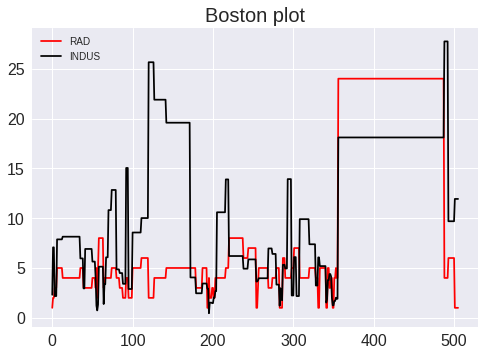

In [20]:
ax =df[['RAD','INDUS']].plot.line(
    color=['red','black'],
    fontsize=16
)
ax.set_title("Boston plot", fontsize=20)
sns.despine(bottom=True,left=True)

# Subplots

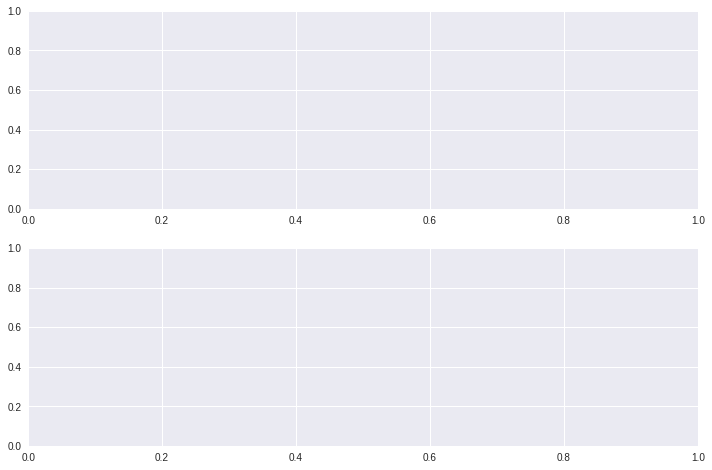

In [21]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

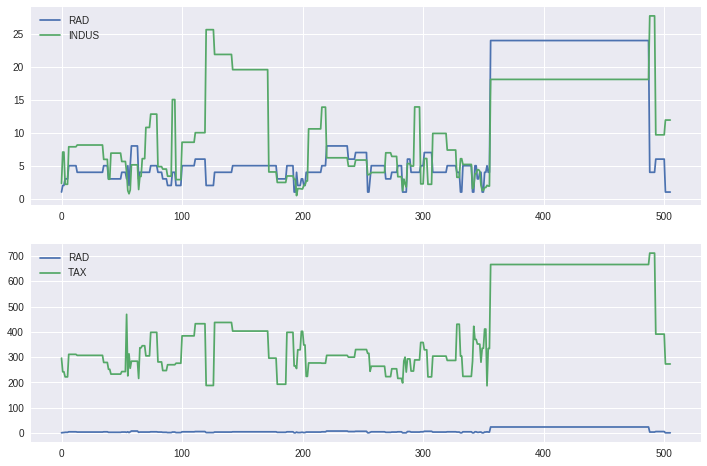

In [22]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

df[['RAD','INDUS']].plot.line(
    ax=axarr[0]
)


df[['RAD','TAX']].plot.line(
    ax=axarr[1]
)

# Plotting with seaborn

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


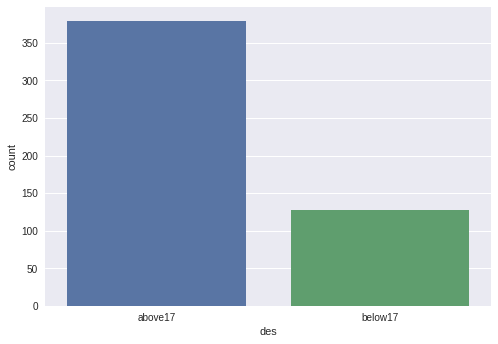

In [24]:
# pandas bar chart becomes a count plot
sns.countplot(df['des'])

In [30]:
print("The column des has {} na values".format(sum(df['des'].isna())))

The column des has 0 na values


## Kernel Density Estimate (KDE) plot

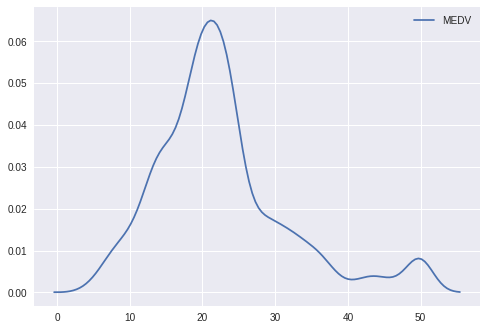

In [31]:
sns.kdeplot(df['MEDV'])

See also:

https://www.kaggle.com/residentmario/plotting-with-seaborn

## Bivariate KDE

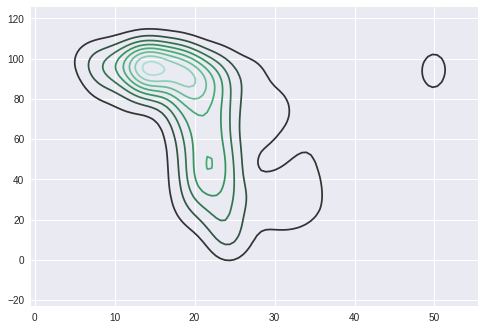

In [32]:
#df.plot(y='MEDV',x='AGE',kind='scatter')
sns.kdeplot(df[['MEDV','AGE']])

## Displot

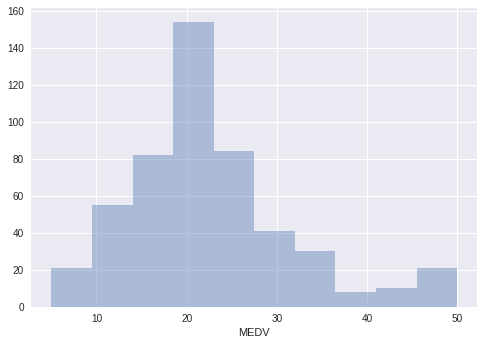

In [33]:
sns.distplot(df['MEDV'], bins=10, kde=False)

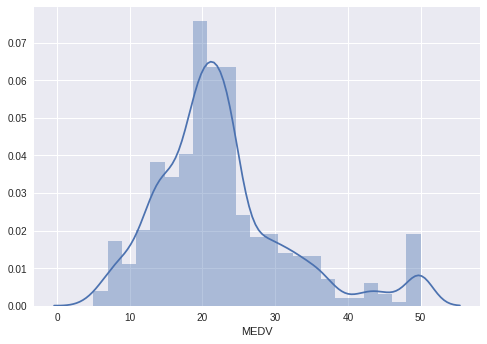

In [51]:
sns.distplot(df['MEDV'])

## Scatterplot and hexplot

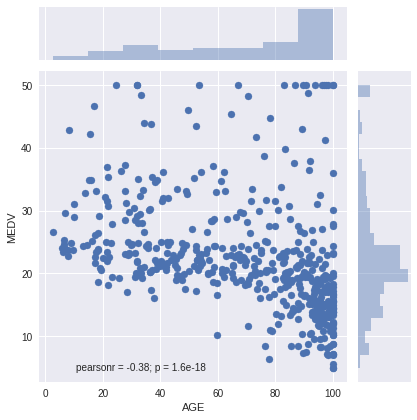

In [35]:
sns.jointplot(x='AGE', y='MEDV', data=df)

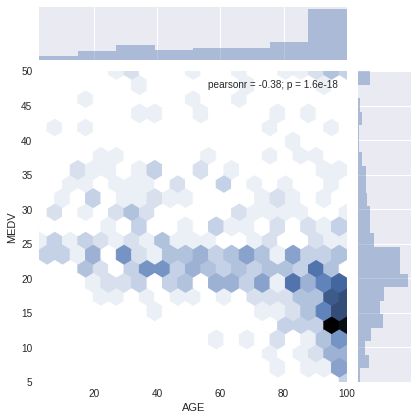

In [36]:
# use kind is hex to deal with over plotting
sns.jointplot(x='AGE', y='MEDV', data=df,kind='hex',gridsize=20)

## Boxplot and violin plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


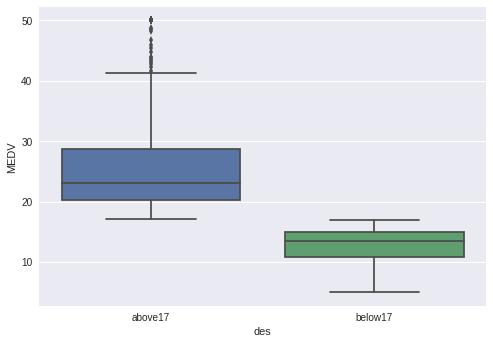

In [37]:
#df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='des',
    y='MEDV',
    data=df
)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


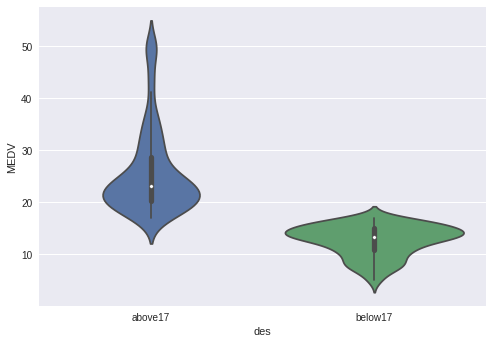

In [40]:
# violin plot
sns.violinplot(
    x='des',
    y='MEDV',
    data=df
)